# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [2]:
import numpy as np
import pandas as pnd
df = pnd.read_csv('titanium.csv')
df.head()
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

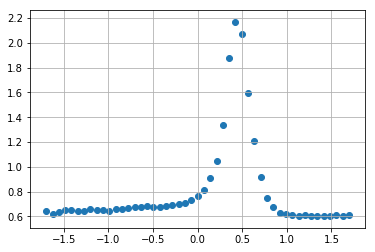

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = (scaler.fit_transform(df.x)).reshape(-1,1)
y = df.y
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x.reshape(-1,1),y)
plt.grid(True)

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [11]:
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [22]:
C_range = np.logspace(-3, 2, 8)
C_range

array([  1.00000000e-03,   5.17947468e-03,   2.68269580e-02,
         1.38949549e-01,   7.19685673e-01,   3.72759372e+00,
         1.93069773e+01,   1.00000000e+02])

In [14]:
#for i in range(len(C_range)):
#    lin_svm = SVR(kernel = 'linear', C = C_range[i], epsilon=0.01)
#    poly_svm = SVR(kernel = 'poly',degree = 3, gamma = 6, coef0 = 1, C = C_range[i], epsilon=0.01)
#    rbf_svm = SVR(kernel = 'rbf',gamma = 6, coef0 = 1, C = C_range[i], epsilon=0.01)
#    lin_svm.fit(x_train,y_train)
#    poly_svm.fit(x_train,y_train)
#    rbf_svm.fit(x_train,y_train)
    

In [15]:
C_range = np.logspace(-2, 5, 8)
lin_svm = SVR(kernel = 'linear')
poly_svm = SVR(kernel = 'poly',degree = 3, gamma = 6, coef0 = 1)
rbf_svm = SVR(kernel = 'rbf',gamma = 6, coef0 = 1)
param_grid = dict(C = C_range,epsilon = [0.01])#переделать на 0.01
grid_lin = GridSearchCV(lin_svm, param_grid= param_grid,error_score=mean_absolute_error)
grid_lin.fit(x_train,y_train)
print('linear learned!')
grid_poly = GridSearchCV(poly_svm, param_grid= param_grid,error_score=mean_absolute_error)
grid_poly.fit(x_train,y_train)
print('poly learned!')
grid_rbf = GridSearchCV(rbf_svm, param_grid= param_grid,error_score=mean_absolute_error)
grid_rbf.fit(x_train,y_train)
print('rbf learned!')

linear learned!
poly learned!
rbf learned!


In [26]:
grid_poly.best_estimator_

SVR(C=100.0, cache_size=200, coef0=1, degree=3, epsilon=0.01, gamma=6,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
def plot1(gridcv,a,b,c,sign,label,label2):
    plt.subplot(a,b,c)
    plt.title('{0}, with C = {1}'.format(label,label2))
    plt.scatter(x,y,label="Original")
    plt.scatter(x,gridcv.predict(x),label="Predicted")
    plt.legend(loc=2)
    plt.grid(True)

    plt.subplot(a,b,c+1)
    plt.title("Mean Absolute Error, {} kernel".format(label))
    plt.plot(C_range,sign*gridcv.cv_results_['mean_test_score'],'o-')
    plt.semilogx()
    plt.grid(True)

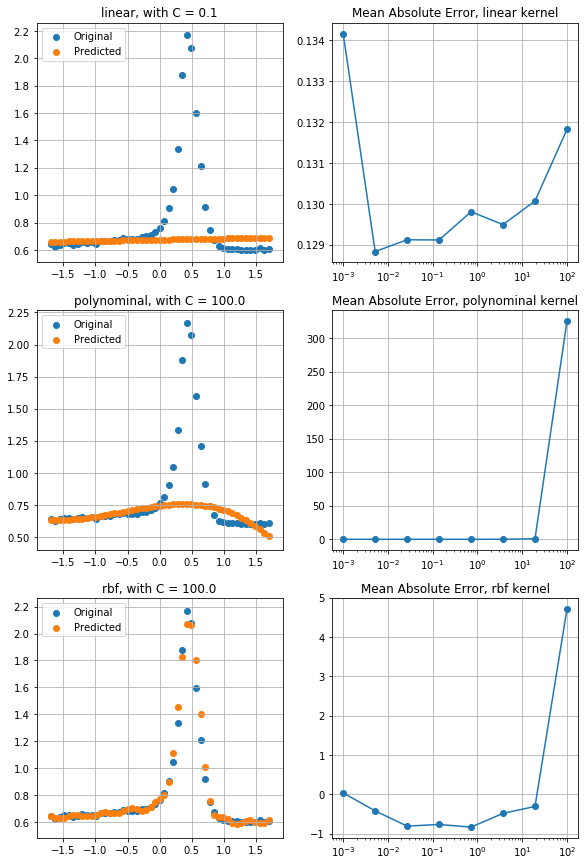

In [25]:
plt.figure(figsize=[15,15])

plot1(grid_lin,3,3,1,-1,"linear",grid_lin.best_params_['C'])
plot1(grid_poly,3,3,4,-1,"polynominal",grid_poly.best_params_['C'])
plot1(grid_rbf,3,3,7,-1,"rbf",grid_rbf.best_params_['C'])
plt.show()

In [29]:
#Вывод: rbf-ядро, основанное на радиально-базисных функциях, показало наименьшую ошибку с параметром регуляризации 0.01
#(на графике C=100, так как при этом значении ошибка в районе -0.088 - старается минимизировать, 
#но по модулю это больше чем ри С = 0.01)
#Полиноминальное ядро при высокой регуляризации неообучается, наилучшее значение при С = 0.01
#Ввиду нелинейного характера данных, линейное ядро плохо предсказывает значения "колокола", ошибка высокая. 
#Эта модель плохо подходит для этих данных. Недообучена. 

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [3]:
eng = pnd.read_csv('war_and_peace_en.txt',header = None,names=['word'])
eng['label']=np.zeros(len(eng))
esp = pnd.read_csv('war_and_peace_es.txt',header = None,names=['word'])
esp['label']=np.ones(len(esp))
df = pnd.DataFrame(np.concatenate([eng,esp],axis=0))
df.columns = ['word','label']

In [4]:
[len(eng),len(esp),len(df)]

[5044, 6359, 11403]

In [5]:
# like this

df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [6]:
RND_SEED = 54321

In [7]:
from sklearn.model_selection import train_test_split
text_train,text_test,answer_train,answer_test = train_test_split(df.word,df.label,test_size = 0.2, random_state = RND_SEED)

In [8]:
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pnd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import permutation_test_score

In [9]:
C_range = [0.001,0.01,0.1,1,10,100]
ngram_range_list = [(1,2),(2,2),(2,3)]
scores = [[1 for x in range(len(ngram_range_list))] for y in range(len(C_range))] 
labels = []
answer_train = np.asarray(answer_train,dtype="float")
#a.astype(np.double)
answer_test = answer_test.astype(float).apply(np.round)

In [10]:
for i in range(len(C_range)):
    for j in range(len(ngram_range_list)):
        pipe = make_pipeline(CountVectorizer(analyzer='char',ngram_range = ngram_range_list[j]),SVC(kernel='linear',C=C_range[i]))
        estimator = pipe.fit(text_train,answer_train)
        labels.append('{0}, {1}'.format(C_range[i],ngram_range_list[j]))
        scores[i][j] = estimator.score(text_test.ravel(),answer_test.round())

In [12]:
max_score_i = 0
max_score_j = 0
for i in range(len(C_range)):
    for j in range(len(ngram_range_list)):
        if (scores[i][j] >= scores[max_score_i][max_score_j]):
            max_score_i = i
            max_score_j = j

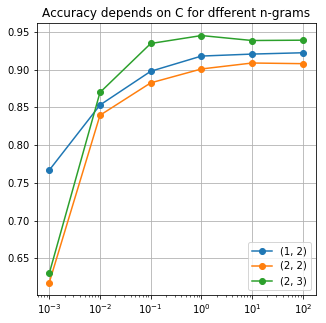

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.title('Accuracy depends on C for dfferent n-grams')
plt.xlabel='C'
plt.ylabel='error'
plt.semilogx()
plt.plot(C_range,np.array(scores)[::,0],'o-',label = '{0}'.format(ngram_range_list[0]))
plt.plot(C_range,np.array(scores)[::,1],'o-',label = '{0}'.format(ngram_range_list[1]))
plt.plot(C_range,np.array(scores)[::,2],'o-',label = '{0}'.format(ngram_range_list[2]))
plt.legend(loc = 4)
plt.grid(True)

In [ ]:
#Такой набор n-gram был выбран в качестве здравого смысла, так как ngram'мы размера 1 представляют из себя букву, 
#что недостаточно информативно. Больше 3 также смысла немного, так как чем длиньше последовательность, тем меньше вероятность совпадения
#Наименьшая ошибка была получени при параметре регуляризации, равном 0.001 и применении n-gram размера 2. (биграммы)

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [55]:
dfnew = df.sample(frac = 1).reset_index(drop = True)
dfnewcutted = dfnew[:1000]

In [76]:
RND_SEED = 32228
X_train,X_test,y_train,y_test = train_test_split(dfnew.index.values,dfnew.label,test_size = 0.2, random_state = RND_SEED)
X_cut_train,X_cut_test,y_cut_train,y_cut_test = train_test_split(dfnewcutted.index.values,dfnewcutted.label,test_size = 0.2, random_state = RND_SEED)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [58]:
import math

In [ ]:
X_cut_train_kernel = string_kernel(X_cut_train,X_cut_train)
plt.imshow(X_cut_train_kernel)

In [94]:
def string_kernel(U,V): #в U и V находятся слова, то есть G - расстояние каждого с каждым
    G = [[1 for x in range(len(V))] for y in range(len(U))] 
    for i in range(len(U)):
        for j in range(len(V)):
            #print('{0} {1}'.format(U[i],V[j]))
            levenstein = wfi_levenshtein(str(dfnew.iloc[U[i]:0]),str(dfnew.iloc[V[i]:0]))
            G[i][j] = math.exp(-1*((levenstein)^2))
    return G 

In [62]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0
    len_1 = len(string_1)
    len_2 = len(string_2)
    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1
    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2
    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]
    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]
            if string_1[i] != string_2[j]:
                # substitution
                cost += 1
                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost
                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost
            d1[j + 1] = cost
        d0, d1 = d1, d0
    return d0[-1]

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.